# MAGIC-Gamma-Telescope

https://www.youtube.com/watch?v=i_LwzRVP7bg

https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

# Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./magic04.data.csv')

In [3]:
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [4]:
df['class'] = (df['class'] == 'g').astype(int)
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

# Histograms

In [5]:
for label in df.columns[:-1]:
    _ = plt.hist(df[df['class'] == 1][label], label='gamma',
                 color='blue', alpha=0.7, density=True)
    _ = plt.hist(df[df['class'] == 0][label], label='hadron',
                 color='red', alpha=0.7, density=True)
    _ = plt.title(label)
    _ = plt.ylabel('Probability')
    _ = plt.xlabel(label)
    _ = plt.legend()
    _ = plt.show()

# Train test splitting

In [6]:
train, valid, test = np.split(
    df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

# Scaling and oversampling

**Oversampling**
  - Balancing class distribution.
  - Increases minority class instances.

In [7]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [8]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack(
        (X, np.reshape(y, (-1, 1)))
    )

    return data, X, y

In [9]:
# Before oversampling the class column
len(train['class'])
sum(train['class'] == 1)
sum(train['class'] == 0)  # 0 in minority

11412

7414

3998

In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [11]:
# After oversampling the class column
len(y_train)
sum(y_train == 1)
sum(y_train == 0)

14828

7414

7414

# kNN Introduction

- **K Nearest Neighbors (KNN):**
  - Supervised machine learning algorithm.
  - Classifies a data point based on majority class among its K nearest neighbors.

- **Euclidean Distance:**
  - Measures straight-line distance between two points in space.
  - $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

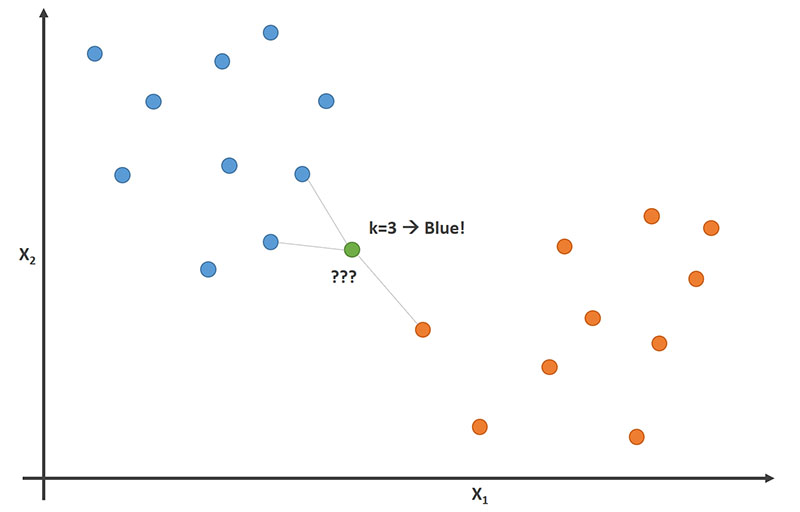

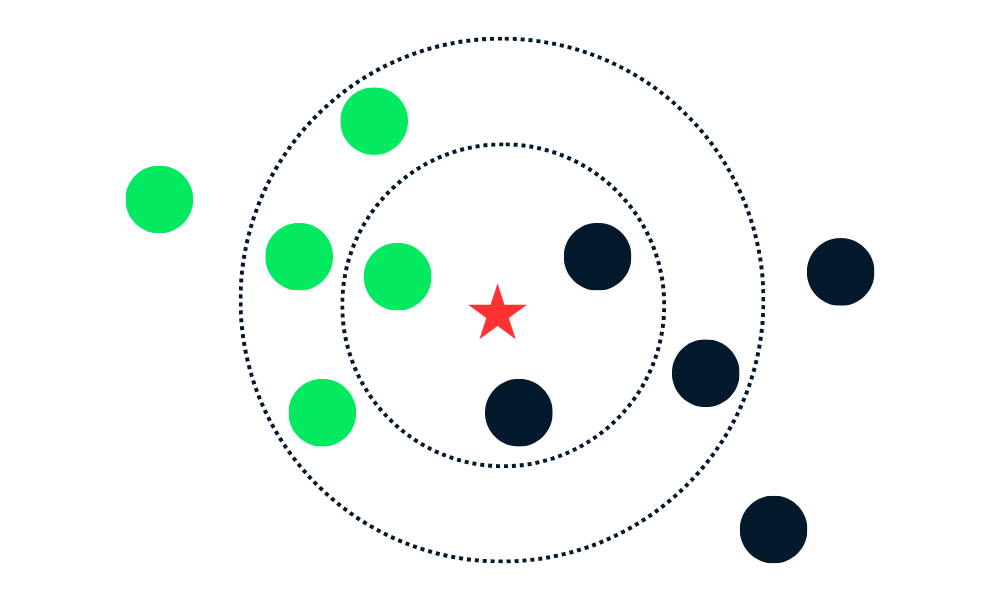

# 🤖 Model: KNeighborsClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1348
           1       0.86      0.87      0.86      2456

    accuracy                           0.82      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.82      0.82      0.82      3804



# F1 Score
  - Harmonic mean of precision and recall.
  - Balances false positives and false negatives.
  $$ F1 = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

# Precision and recall
  - **Precision:**
    - Proportion of true positive predictions among all positive predictions.
    $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $$

  - **Recall (Sensitivity/True Positive Rate):**
    - Proportion of true positive predictions among all actual positives.
    $$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $$

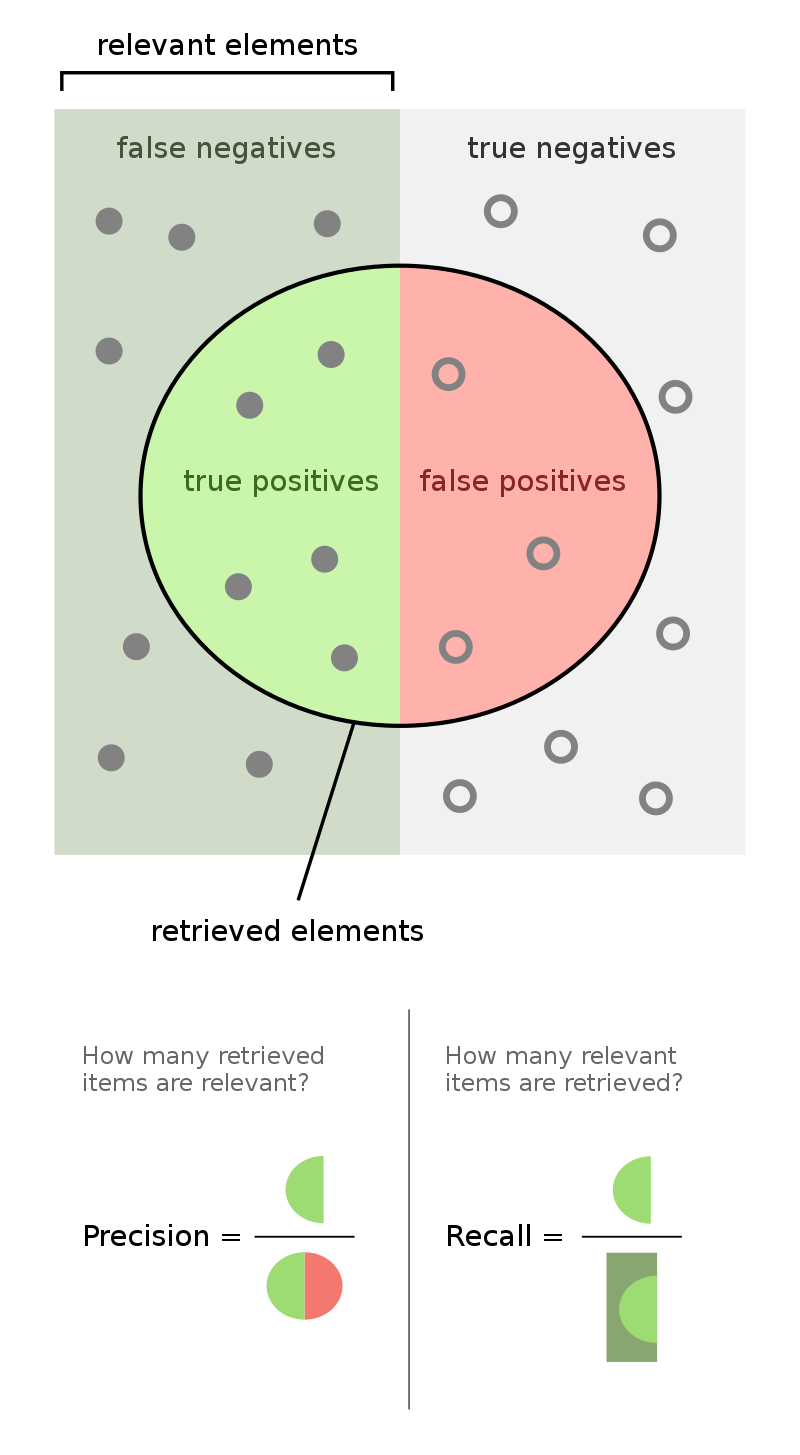

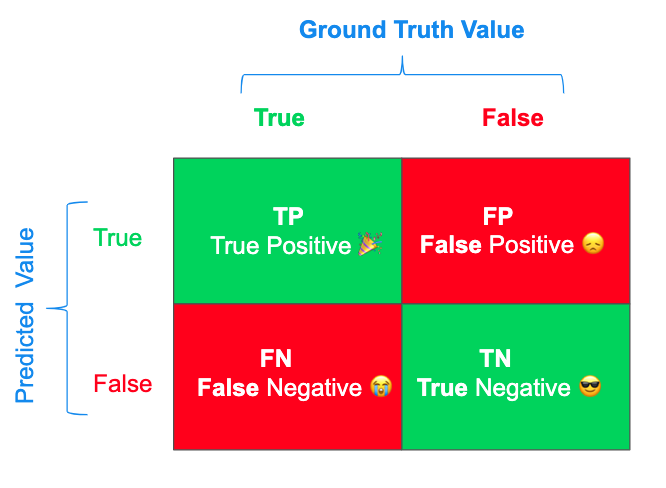

# Bayes' rule

**Bayes' Rule:**

- Probabilistic formula for updating probabilities.
  
**Formula:**

$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $

- $ P(A|B) $: Posterior probability of A given B.
- $ P(B|A) $: Likelihood of B given A.
- $ P(A) $: Prior probability of A.
- $ P(B) $: Evidence probability.

**Application:**

- Bayesian Inference: Update beliefs based on new evidence.

### **Covid Test Results**

|                     | Test Positive | Test Negative |
|---------------------|---------------|---------------|
| Actually Has COVID  | 531           | 6             |
| Actually No COVID   | 20            | 9443          |

- **Metrics:**

  - **Precision:**
    - $ \text{Precision} = \frac{531}{531 + 20} $
    - 🫚 $ P(\text{Covid}|\text{Positive}) = Precision $

  - **Recall:**
    - $ \text{Recall} = \frac{531}{531 + 6} $

**Another problem 👇👇**

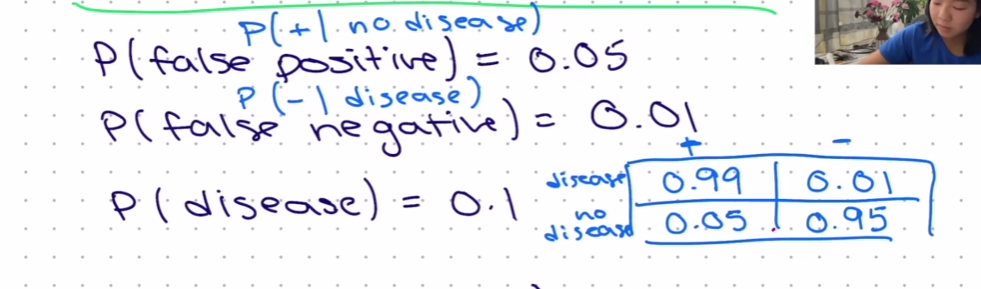


### **Bayes Rule Terms**

**Posterior = (Prior * Likelihood) / Evidence**

  - **Prior:**
    - Initial belief or probability before considering new evidence.

  - **Likelihood:**
    - Probability of observing evidence given a certain hypothesis.

  - **Posterior:**
    - Updated probability after considering both prior and evidence.

  - **Evidence:**
    - Observations or data used to update prior beliefs.

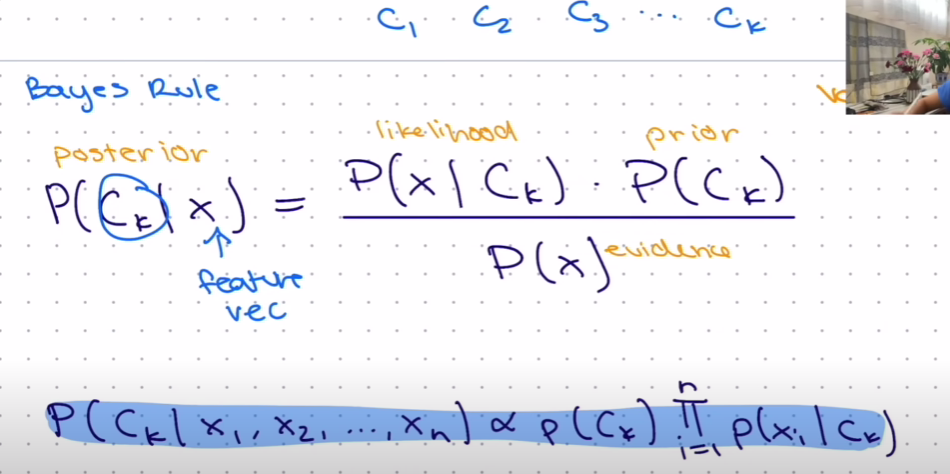

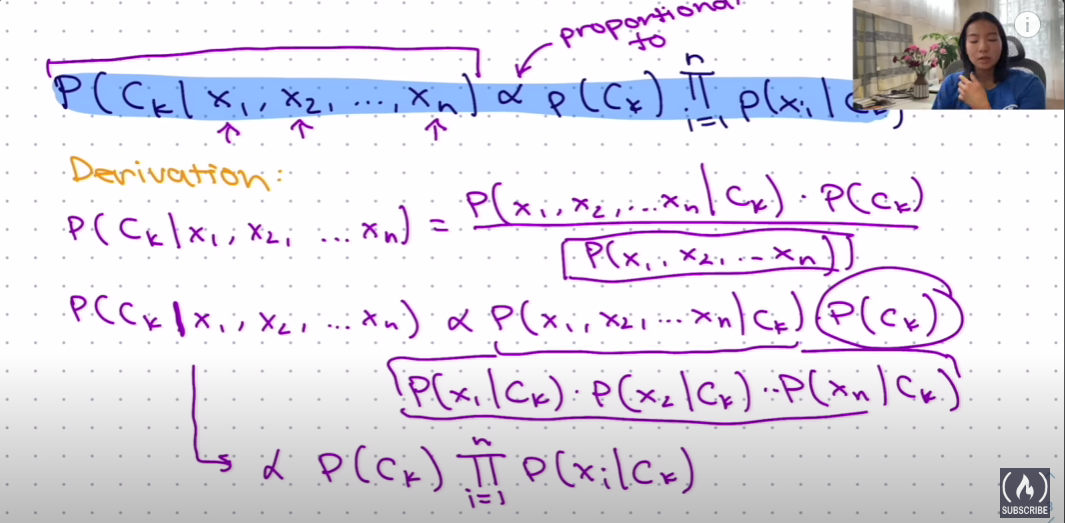

### **Maximum A Posteriori (MAP)**
  - Estimation of the most likely value in a Bayesian framework.
  - It finds the parameter value that maximizes the posterior probability.

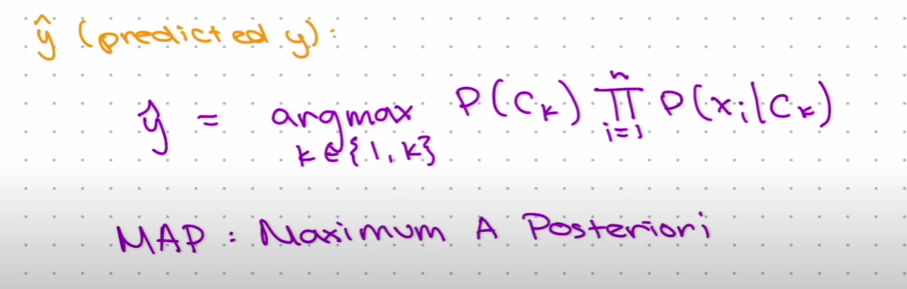

# 🤖 Model: Naive Bayes Classifier

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.42      0.53      1348
           1       0.74      0.90      0.81      2456

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# Logistic regression

  - Binary classification algorithm.
  - Models the probability of an instance belonging to a particular class.
  - Uses the logistic function (sigmoid) to map the output between 0 and 1.

**Sigmoid Function**
  - Maps any real-valued number to the range [0, 1].
  - Formula: $ \sigma(z) = \frac{1}{1 + e^{-z}} $

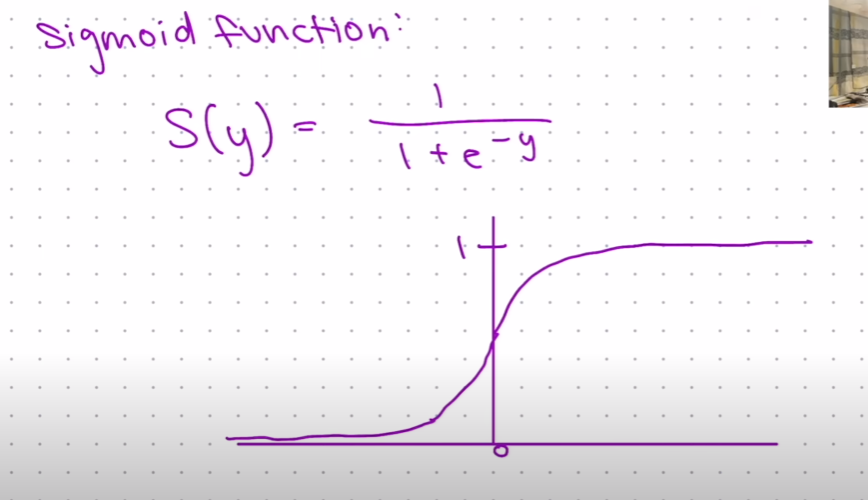

# 🤖 Model: LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1348
           1       0.85      0.83      0.84      2456

    accuracy                           0.79      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



# Support vector machines
  - Binary classification algorithm.
  - Finds the hyperplane that best separates classes in feature space.
  - Maximizes the margin between classes.


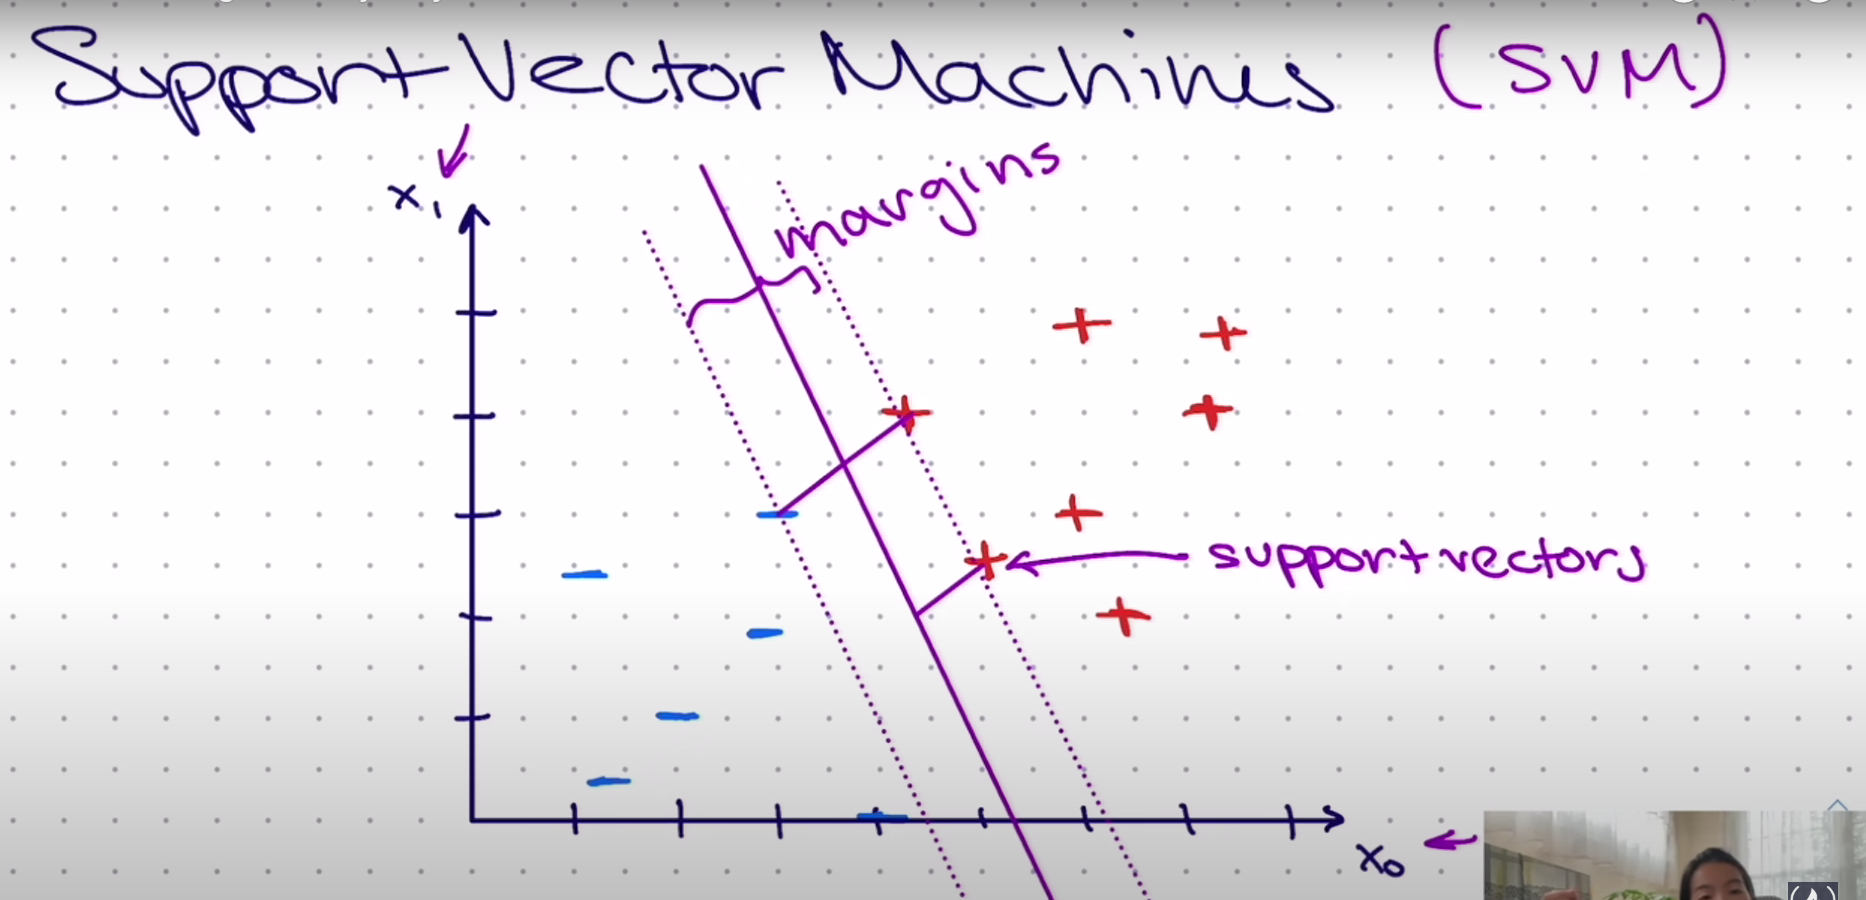

### The kernel trick

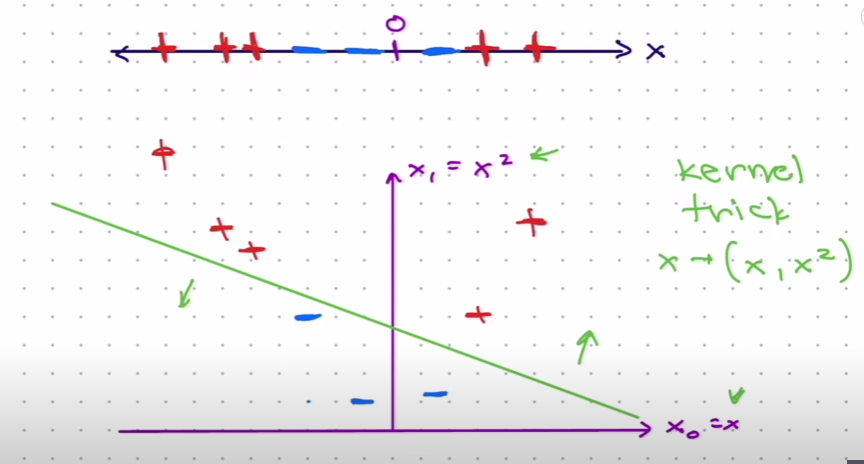

# 🤖 Model: SVC

In [21]:
from sklearn.svm import SVC

In [22]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [23]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1348
           1       0.89      0.90      0.90      2456

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



# Neural networks
  - Deep learning model inspired by the human brain's structure.
  - Consists of layers of interconnected nodes (neurons).
  - Learns complex patterns and representations from data.

- **Neural Network Components:**
  - **Input:**
    - Initial data provided to the neural network.
  
  - **Weight:**
    - Coefficient applied to the input features in each neuron.

  - **Bias:**
    - Constant term added to the weighted sum in each neuron.
  
  - **Activation Function:**
    - Non-linear function applied to the weighted sum and bias.
    - Introduces non-linearity to the model.

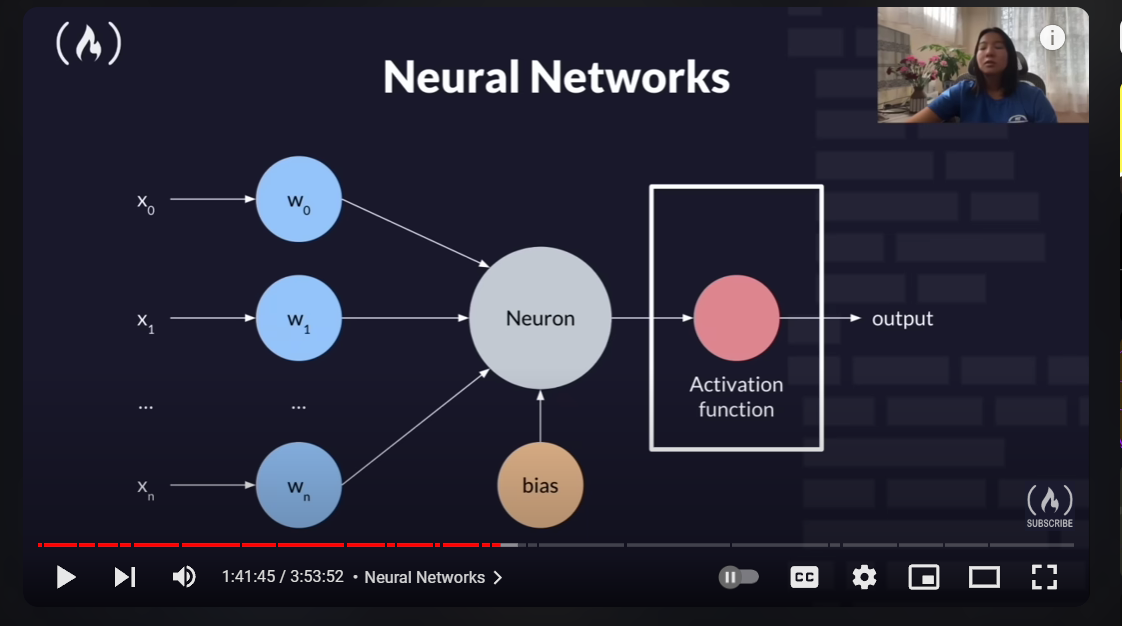

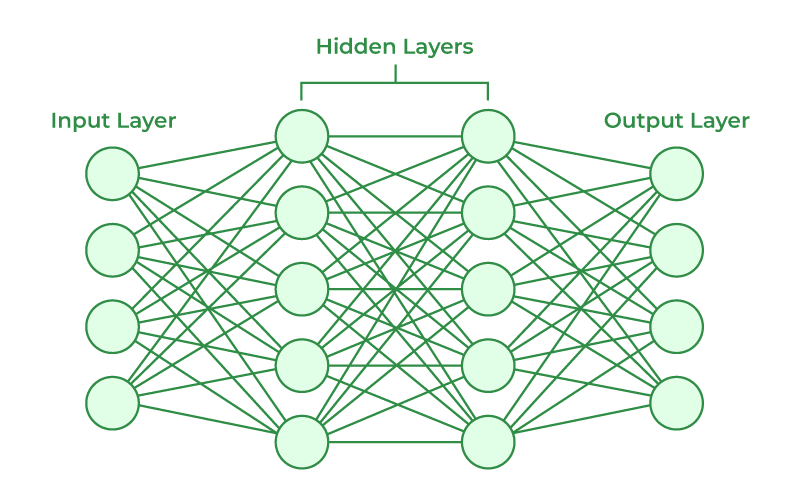

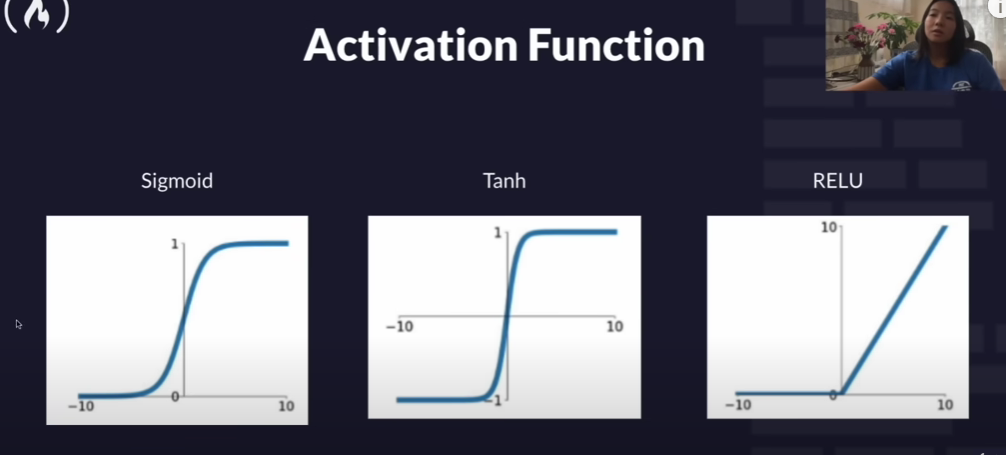

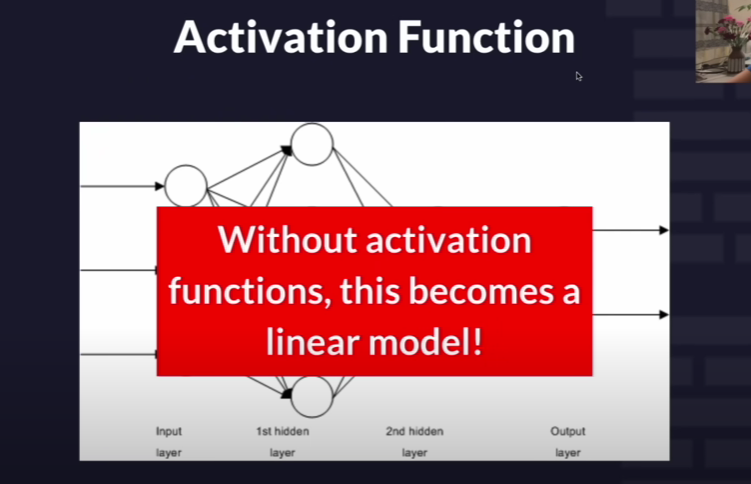

# Backpropagation
  - Training algorithm for updating weights and biases.
  - Minimizes the error by adjusting parameters based on gradients.
  - Involves two passes: forward pass (calculating output) and backward pass (updating weights).

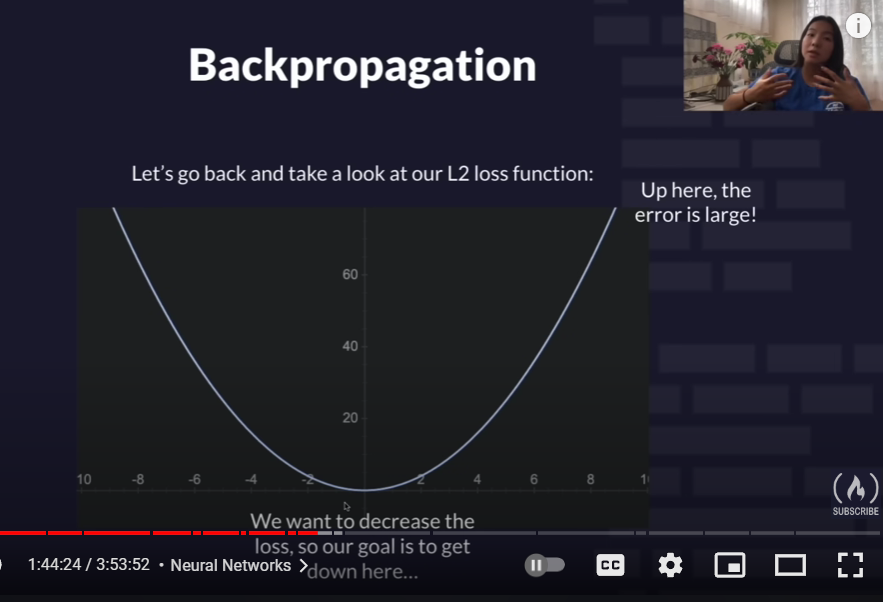

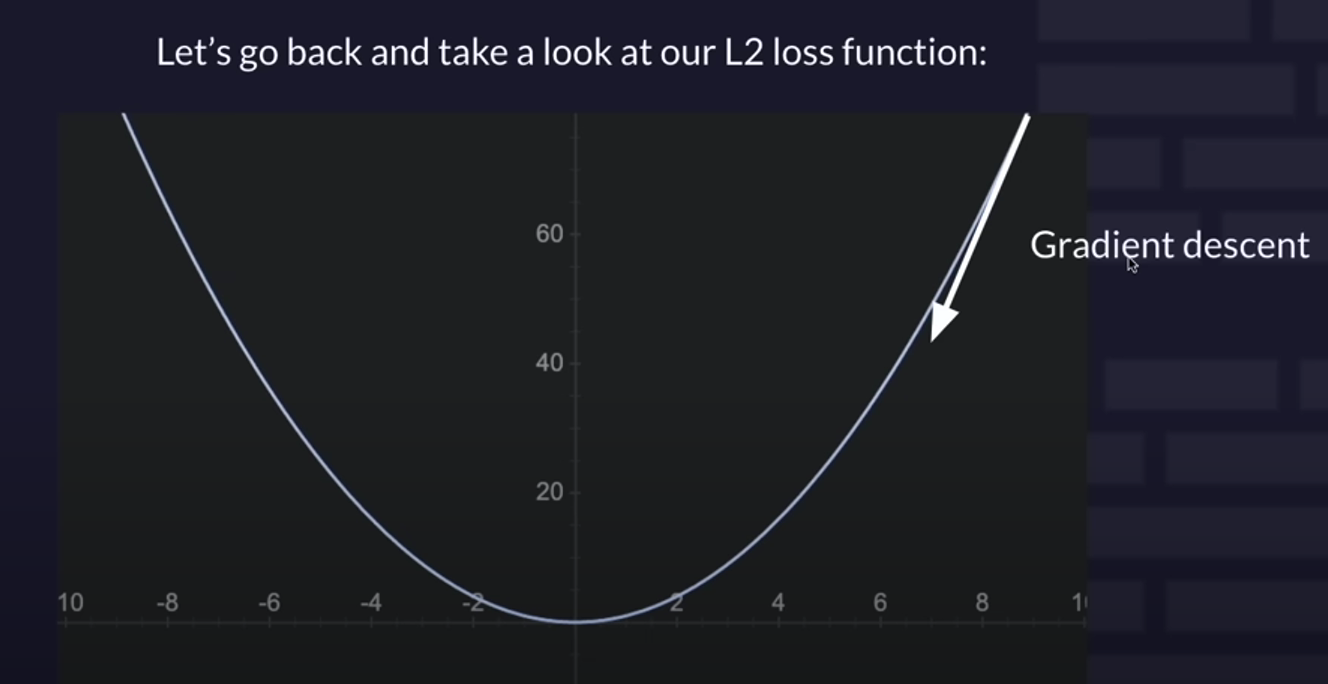

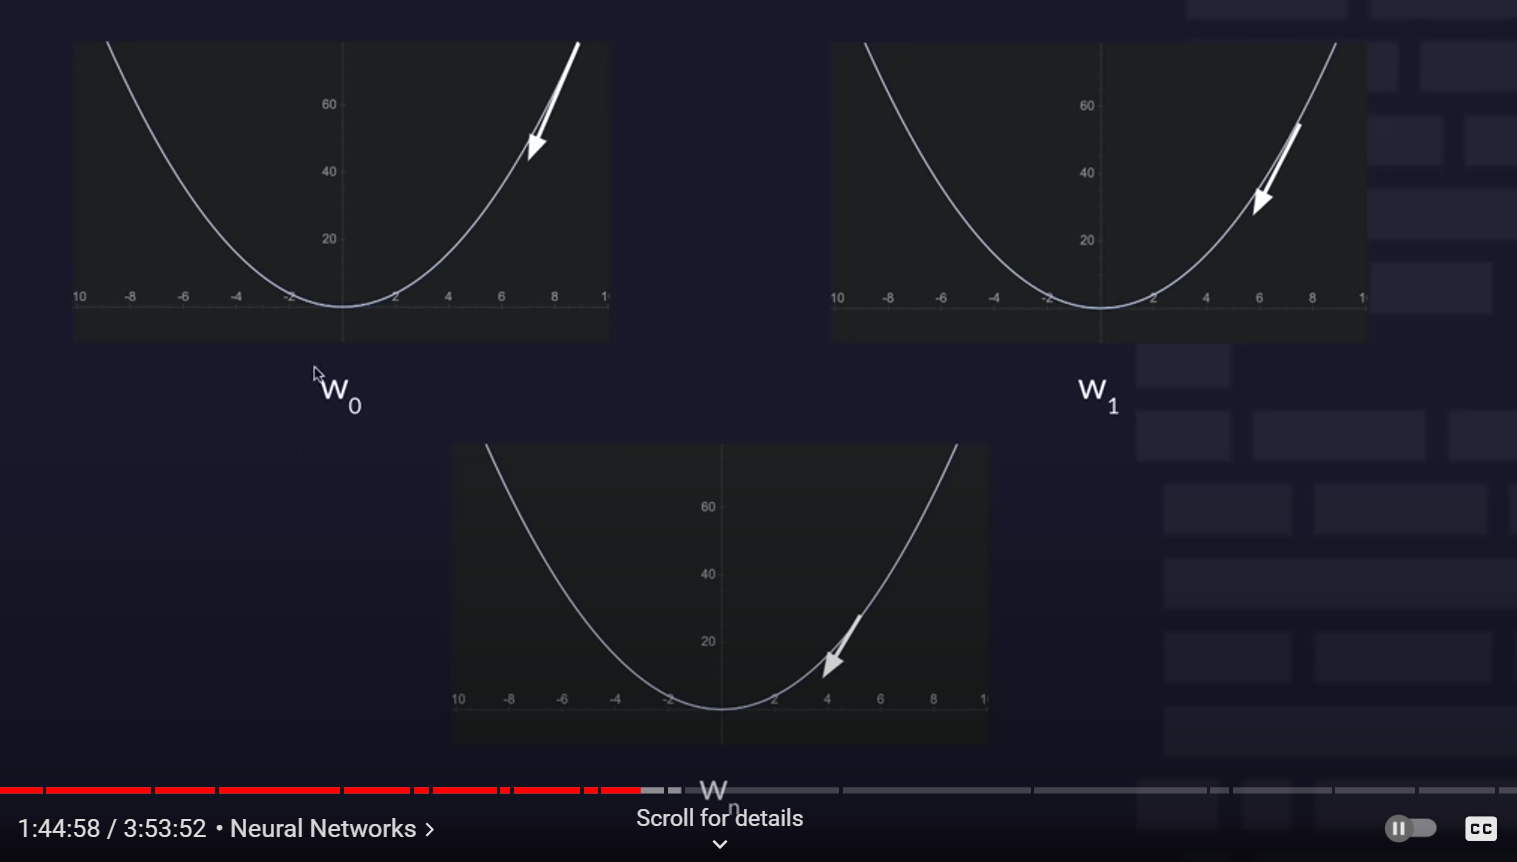

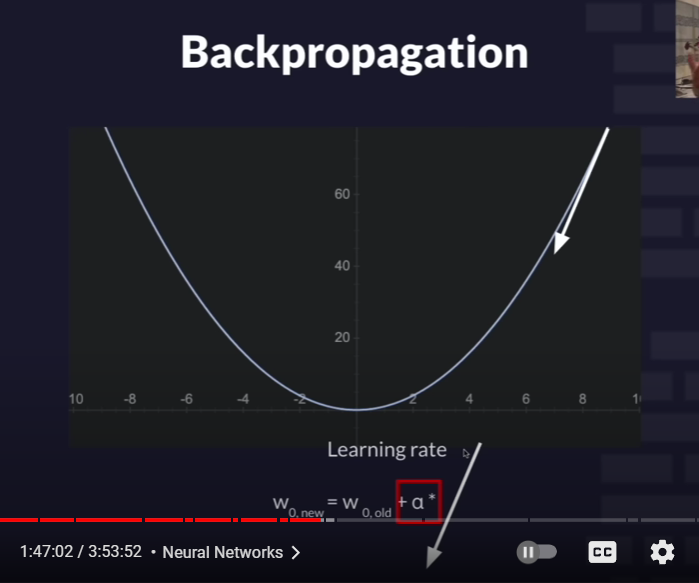

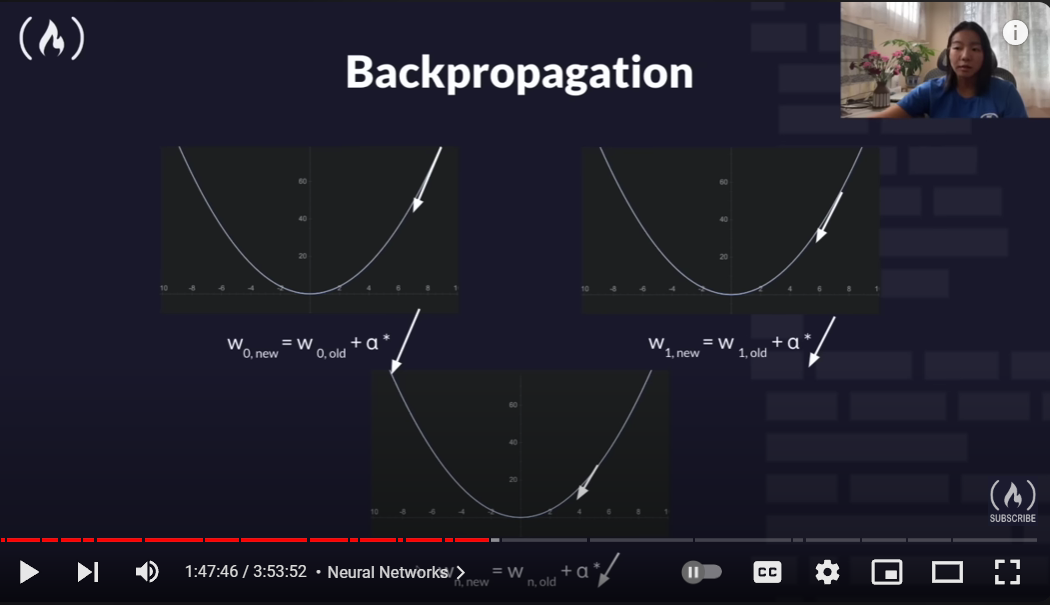

# 🤖 Model: NN

In [24]:
import tensorflow as tf

In [25]:
def plot_loss(history):
    _ = plt.plot(history.history['loss'], label='loss')
    _ = plt.plot(history.history['val_loss'], label='val_loss')
    _ = plt.xlabel('Epoch')
    _ = plt.ylabel('Binary crossentropy')
    _ = plt.legend()
    _ = plt.grid(True)
    _ = plt.show()


def plot_accuracy(history):
    _ = plt.plot(history.history['accuracy'], label='accuracy')
    _ = plt.plot(history.history['val_accuracy'], label='val_accuracy')
    _ = plt.xlabel('Epoch')
    _ = plt.ylabel('Accuracy')
    _ = plt.legend()
    _ = plt.grid(True)
    _ = plt.show()

In [46]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([

        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),

        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),

        tf.keras.layers.Dense(1, activation='sigmoid'),

    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                     loss='binary_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(X_train, y_train, epochs=epochs,
                           batch_size=batch_size, validation_split=0.2, verbose=False)

    return nn_model, history

In [47]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    _ = ax1.plot(history.history['loss'], label='loss')
    _ = ax1.plot(history.history['val_loss'], label='val_loss')
    _ = ax1.set_xlabel('Epoch')
    _ = ax1.set_ylabel('Binary crossentropy')
    _ = ax1.legend()
    _ = ax1.grid(True)

    _ = ax2.plot(history.history['accuracy'], label='accuracy')
    _ = ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    _ = ax2.set_xlabel('Epoch')
    _ = ax2.set_ylabel('Accuracy')
    _ = ax2.legend()
    _ = ax2.grid(True)

    _ = plt.show()

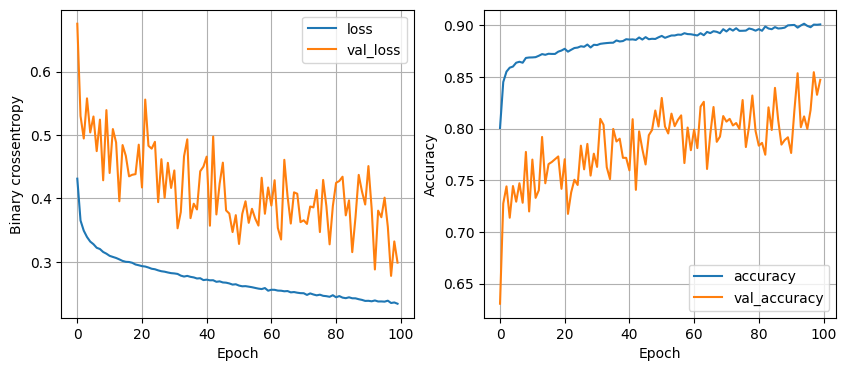

In [48]:
plot_history(history)

num_nodes=64 dropout_prob=0.2 lr=0.005 batch_size=32 epochs=100


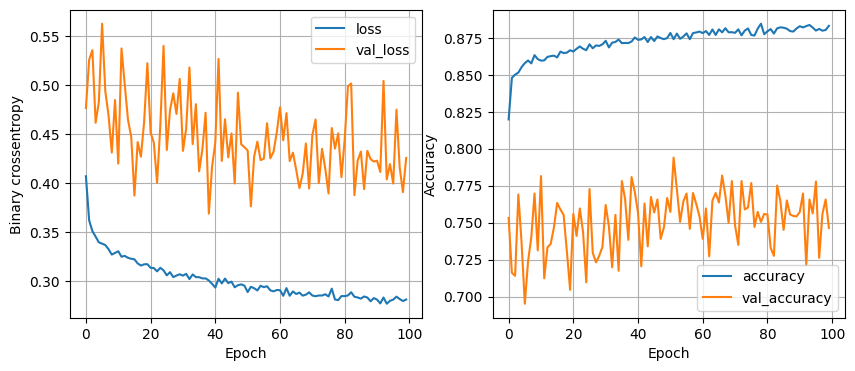

119/119 [==============================] - 0s 920us/step - loss: 0.3067 - accuracy: 0.8759
num_nodes=64 dropout_prob=0.2 lr=0.005 batch_size=64 epochs=100


119/119 [==============================] - 0s 940us/step - loss: 0.3067 - accuracy: 0.8780
num_nodes=64 dropout_prob=0.2 lr=0.001 batch_size=32 epochs=100


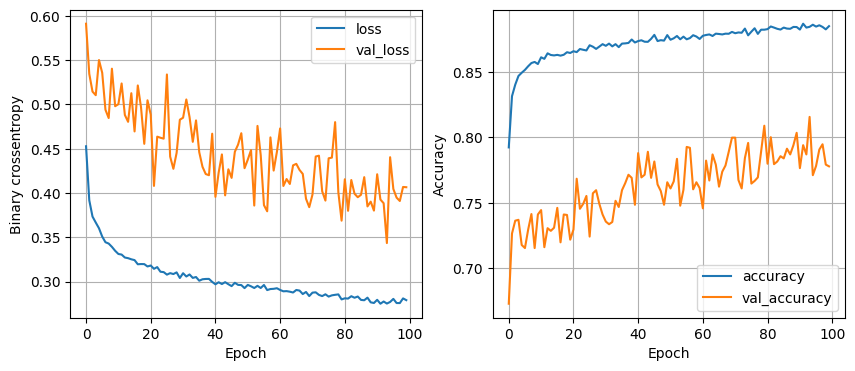

119/119 [==============================] - 0s 914us/step - loss: 0.2941 - accuracy: 0.8772
num_nodes=64 dropout_prob=0.2 lr=0.001 batch_size=64 epochs=100


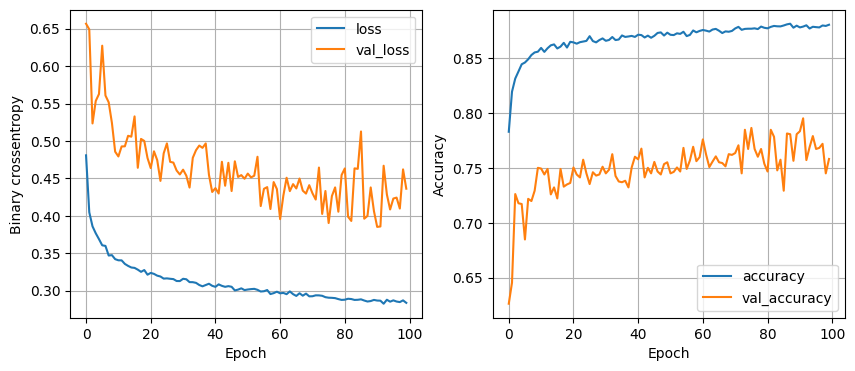

119/119 [==============================] - 0s 904us/step - loss: 0.3011 - accuracy: 0.8780


In [53]:
least_validation_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [64]:
    for dropout_prob in [0.2]:
        for lr in [0.005, 0.001]:
            for batch_size in [32, 64]:
                # for num_nodes in [16, 32, 64]:
                #     for dropout_prob in [0, 0.2]:
                #         for lr in [0.01, 0.005, 0.001]:
                #             for batch_size in [32, 64, 128]:
                print(f'{num_nodes=} {dropout_prob=} {lr=} {batch_size=} {epochs=}')
                model, history = train_model(
                    X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_validation_loss:
                    least_validation_loss = val_loss
                    least_loss_model = model

In [55]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 0s 780us/step


array([1, 0, 0, ..., 1, 1, 0])

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1348
           1       0.88      0.95      0.91      2456

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.87      3804
weighted avg       0.88      0.88      0.88      3804

